## Exercise 6.1


### Part 1

In [13]:
import pandas as pd
import cv2
import numpy as np
import cv2
from tqdm import tqdm_notebook


In [3]:
df = pd.read_csv('trailers.csv')

In [11]:
df.head()

,trailer_title,url,imdb_id,year,rating,votes,genre
0,THE BIG PARADE trailer,https://archive.org/download/TheBigParadeTrail...,15624,1925,7.9,6148.0,Drama|Romance|War
1,ALL QUIET ON THE WESTERN FRONT 1930 trailer,https://archive.org/download/AllQuietOnTheWest...,20629,1930,8.0,56948.0,Drama|War
2,THE OREGON TRAIL trailer,https://archive.org/download/TheOregonTrailTra...,20691,1926,7.2,3353.0,Adventure|Romance|Western
3,FIVE STAR FINAL trailer,https://archive.org/download/FiveStarFinalTrai...,21873,1931,7.2,1790.0,Crime|Drama
4,LITTLE CAESAR trailer,https://archive.org/download/LittleCaesarTrail...,21079,1931,7.3,11958.0,Action|Crime|Drama|Romance


In [8]:
df['trailer_title']

0                           THE BIG PARADE trailer
1      ALL QUIET ON THE WESTERN FRONT 1930 trailer
2                         THE OREGON TRAIL trailer
3                          FIVE STAR FINAL trailer
4                            LITTLE CAESAR trailer
                          ...                     
937                               IMPOSTOR trailer
938                     THE INVISIBLE BOY trailers
939                           THE WEREWOLF trailer
940                                REBECCA trailer
941                          MARK OF DEVIL trailer
Name: trailer_title, Length: 942, dtype: object

In [12]:
df.sort_values('rating', ascending = True)

,trailer_title,url,imdb_id,year,rating,votes,genre
459,MANOS: THE HANDS OF FATE trailer,https://archive.org/download/MANOSTHEHANDSOFFA...,60666,1966,1.9,34678.0,Horror
467,CATALINA CAPER trailer,https://archive.org/download/CatalinaCaperTrai...,61456,1967,2.1,1787.0,Comedy|Musical|Mystery
311,KING DINOSAUR trailer,https://archive.org/download/KingDinosaurTrail...,48256,1955,2.1,1225.0,Adventure|Sci-Fi
408,EEGAH trailer,https://archive.org/download/EEGAHTrailer/EEGA...,55946,2014,2.2,5410.0,Adventure|Comedy|Fantasy|Horror|Music
430,THE CREEPING TERROR trailer,https://archive.org/download/TheCreepingTerror...,57970,1964,2.2,4069.0,Horror|Sci-Fi
...,...,...,...,...,...,...,...
659,LIFE IS BEAUTIFUL trailers,https://archive.org/download/LifeIsBeautifulTr...,118799,1997,8.6,616571.0,Comedy|Drama|Romance|War
666,SAVING PRIVATE RYAN trailers,https://archive.org/download/SavingPrivateRyan...,120815,1998,8.6,1222955.0,Drama|War
879,INCEPTION trailer,https://archive.org/download/INCEPTIONTrailer_...,1375666,2010,8.8,2042536.0,Action|Adventure|Sci-Fi|Thriller
641,FORREST GUMP trailer,https://archive.org/download/FORRESTGUMPTraile...,109830,1994,8.8,1786771.0,Drama|Romance


I am going to choose the JURASSIC WORLD trailer which is one of my favorite movies

In [15]:
from scenedetect import VideoManager
from scenedetect import SceneManager

from scenedetect.detectors import ContentDetector
from scenedetect.scene_manager import generate_images

def find_scenes(video_path, threshold=30.0):
    video_manager = VideoManager([video_path])
    scene_manager = SceneManager()
    scene_manager.add_detector(
        ContentDetector(threshold=threshold))
    base_timecode = video_manager.get_base_timecode()
    video_manager.set_downscale_factor()
    video_manager.start()
    scene_manager.detect_scenes(frame_source=video_manager, show_progress=False)    
    return scene_manager.get_scene_list(base_timecode)

In [18]:
filename = 'JURASSIC WORLD trailer.mp4' # this is our video file
scene_list = find_scenes(filename, threshold=30)

In [19]:
for scene in scene_list:
  print(scene)

(FrameTimecode(frame=0, fps=23.976025), FrameTimecode(frame=120, fps=23.976025))
(FrameTimecode(frame=120, fps=23.976025), FrameTimecode(frame=190, fps=23.976025))
(FrameTimecode(frame=190, fps=23.976025), FrameTimecode(frame=240, fps=23.976025))
(FrameTimecode(frame=240, fps=23.976025), FrameTimecode(frame=305, fps=23.976025))
(FrameTimecode(frame=305, fps=23.976025), FrameTimecode(frame=354, fps=23.976025))
(FrameTimecode(frame=354, fps=23.976025), FrameTimecode(frame=472, fps=23.976025))
(FrameTimecode(frame=472, fps=23.976025), FrameTimecode(frame=657, fps=23.976025))
(FrameTimecode(frame=657, fps=23.976025), FrameTimecode(frame=718, fps=23.976025))
(FrameTimecode(frame=718, fps=23.976025), FrameTimecode(frame=796, fps=23.976025))
(FrameTimecode(frame=796, fps=23.976025), FrameTimecode(frame=833, fps=23.976025))
(FrameTimecode(frame=833, fps=23.976025), FrameTimecode(frame=863, fps=23.976025))
(FrameTimecode(frame=863, fps=23.976025), FrameTimecode(frame=935, fps=23.976025))
(Frame

In [21]:
len(scene_list)

58

#### Question 2

As we can see it has 58 scenes i counted around 55 like the same number maybe the programm has a little more than my eye caught

#### Question 3 

In [22]:
scene_list = find_scenes(filename, threshold=10)
len(scene_list)

152

In [23]:
scene_list = find_scenes(filename, threshold=50)
len(scene_list)

45

The number 10 produces so much more scenes than the 30,50 so the 30 is somehow the best option

#### Question 4

In [24]:
scene_list = find_scenes(filename, threshold=30)
cap = cv2.VideoCapture(filename)

frames = []
shot_length = []

for start_time, end_time in scene_list:
    duration = end_time - start_time
    frame = (start_time.get_frames() + int(duration.get_frames() / 2))
    cap.set(cv2.CAP_PROP_POS_FRAMES,frame)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    shot_length.append(duration.get_seconds())

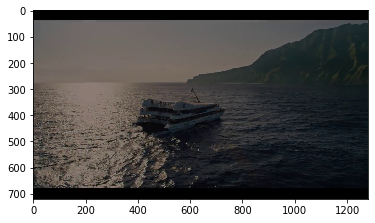

In [25]:
import matplotlib.pyplot as plt

plt.imshow(frames[7]) # print the 7th scene

In [26]:
import os

if not os.path.exists('scenes/'):
    os.mkdir('scenes/')

for i, frame in enumerate(frames):
    cv2.imwrite('scenes/frame_{}.jpg'.format(i), frame)

In [37]:
import tensorflow as tf
from tensorflow import keras


In [41]:
model = keras.models.load_model('shot_classifier.h5')

ValueError: Unknown layer: Functional

In [32]:
from keras.applications import imagenet_utils
model = load_model('shot_classifier.h5', custom_objects={'imagenet_utils': imagenet_utils})

NameError: name 'load_model' is not defined

In [39]:
def preprocess_frame(frame, single_batch=False,  color_mode='rgb'):
    frame = cv2.resize(frame, dsize=(224, 224), interpolation=cv2.INTER_NEAREST)
    if color_mode == 'grayscale':
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    if single_batch:
        frame = tf.expand_dims(frame, 0)
    return frame

processed_frames = [preprocess_frame(frame) for frame in frames]
processed_frames = np.array(processed_frames)
data = tf.data.Dataset.from_tensor_slices(processed_frames).batch(64)

probabilities = model.predict(data, verbose=1)
labels = ['CS', 'ECS', 'FS', 'LS', 'MS']

image_classes = np.argmax(probabilities, axis=1)
image_labels = [labels[image_class] for image_class in image_classes]
print(image_labels)

NameError: name 'model' is not defined